# Limpieza del archivo exel con los datos del titanic:

- 1) explorar columnas: visualizar las columnas, tipo de dato, si contienen datos nulos, registros mal formados, valores atipicos o sin sentido, valores faltantes

- 2) datos desordenados,
 
- 3) eliminar columnas con datos no relevantes




In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Analizar que librerias necesito y eliminar el resto de importaciones commit [main 8fb097c]

dataframe = pd.read_csv('empleado-aris/Titanic.csv')

dataframe.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,We


## Visualizar las columnas y su  tipo de dato

In [36]:
dataframe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
Unnamed: 18    float64
Unnamed: 19    float64
Unnamed: 20    float64
Unnamed: 21    float64
Unnamed: 22    float64
Unnamed: 23    float64
Unnamed: 24    float64
Unnamed: 25     object
dtype: object

## Ahora eliminare las columnas que solo contienen NaN
### Datos nulos 

In [37]:
to_drop = ['Unnamed: 12',
           'Unnamed: 13',
           'Unnamed: 14',
           'Unnamed: 15',
           'Unnamed: 16',
           'Unnamed: 17',
           'Unnamed: 18',
           'Unnamed: 19',
           'Unnamed: 20',
           'Unnamed: 21',
           'Unnamed: 22',
           'Unnamed: 23',
           'Unnamed: 24',
           'Unnamed: 25']

dataframe.drop(columns=to_drop, inplace=True, axis=1)

In [38]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Valores faltantes
Los reemplace con la media ya que cada registro pertenece a una unica persona y elininar las filas con datos faltantes eliminaria datos de sobrevivientes

In [64]:
dataframe.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Valores_Limpios      0
dtype: int64

In [40]:
dataframe['Age'] = dataframe["Age"].fillna(dataframe["Age"].mean())

In [41]:
dataframe['Valores_Limpios'] = (dataframe['Age'].astype(str).str.replace(r"[,\s]", "", regex=True).replace("", None).astype(float))
dataframe.Valores_Limpios

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Valores_Limpios, Length: 891, dtype: float64

## Tablas de frecuencias
Reemplazo los valores NaN por la media ya que estos no se pueden eliminar porque corresponden a un unico sobreviviente del naufragio, luego creo la tabla de frecuencias entre la edad y el sexo agrupando los datos en intervalos y ordenandolos de forma acendente

Nunca voy a olvidarte - Kaleth Morales

#### tabla de contingencia (frecuencias) de los sobrevivientes vs sexo

In [65]:
N = len(dataframe.Age)  
k = int(1 + np.log2(N))  

intervalos = pd.cut(dataframe["Age"], bins=k, include_lowest=True)
pd.crosstab(intervalos, dataframe.Sex)

Sex,female,male
Age,,
"(0.339, 8.378]",26,28
"(8.378, 16.336]",23,23
"(16.336, 24.294]",68,109
"(24.294, 32.252]",105,241
"(32.252, 40.21]",44,74
"(40.21, 48.168]",24,46
"(48.168, 56.126]",16,29
"(56.126, 64.084]",8,16
"(64.084, 72.042]",0,9


## Distribuciones de Datos

## Datos Categoricos


In [43]:
recuento = dataframe.groupby('Pclass')['Survived'].count()
recuento

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

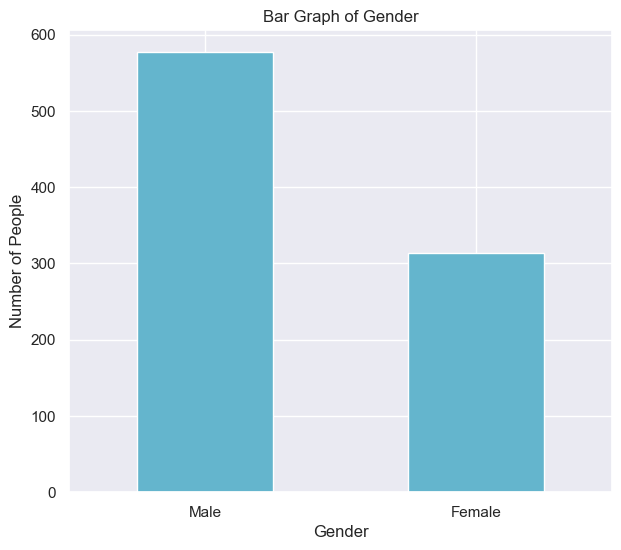

In [63]:
gender = dataframe['Sex'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))
plt.show()

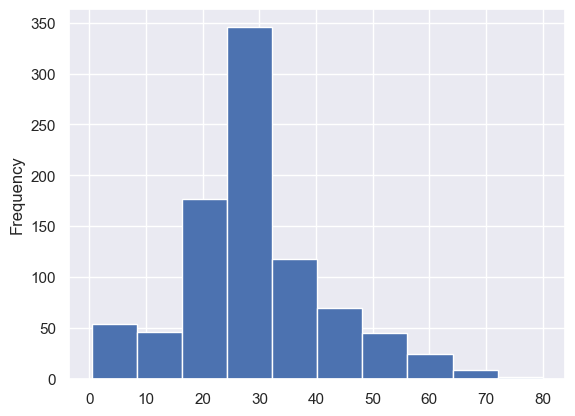

In [67]:
fig, ax = plt.subplots()
dataframe.Age.plot(kind='hist', x = 'Sex', y = 'Age')
#ax.hist(dataframe.Age, dataframe.Sex)
plt.show()

In [ ]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
sns.set()
sns.pairplot(dataframe[cols])

## Registros mal formados - Valores atipicos

Se trataron al corregir los datos de la edad